In [79]:
import xarray as xr
P = xr.open_dataset("../../CAMELS_SW/input_data/P_Camels_SW.nc")
display(P)
SWE= xr.open_dataset("../../CAMELS_SW/input_data/SWE_SW.nc")
display(SWE)
target_periods = ['01/01-30/09','01/02-30/09','01/03-30/09','01/04-30/09','01/05-30/09','01/06-30/09','01/07-30/09','01/08-30/09','01/09-30/09']

<xarray.Dataset>
Dimensions:        (lle: 3, nday: 21915, station: 50)
Coordinates:
  * nday           (nday) datetime64[ns] 1961-01-01 1961-01-02 ... 2020-12-31
  * station        (station) object '1069' '1083' '1123' ... '751' '855' '97'
  * lle            (lle) object 'lon' 'lat' 'elev'
Data variables:
    precipitation  (station, nday) float64 ...
    LLE            (station, lle) float64 ...

<xarray.Dataset>
Dimensions:     (station_id: 914, time: 26663)
Coordinates:
  * time        (time) datetime64[ns] 1949-09-01 1949-09-02 ... 2022-08-31
  * station_id  (station_id) int64 10001 10002 10003 10004 ... 11469 11470 11471
    lon         (station_id) float64 ...
    lat         (station_id) float64 ...
Data variables:
    swe         (time, station_id) float64 ...

In [80]:
# Initialize an empty dictionary to store results for each target period
cumulative_precipitation = {}

# Loop over each target period
for period in target_periods:
    start_date, end_date = period.split('-')
    start_day, start_month = map(int, start_date.split('/'))
    end_day, end_month = map(int, end_date.split('/'))
    
    # Filter dataset for the target period across all years
    mask = (P['nday'].dt.month > start_month) | \
           ((P['nday'].dt.month == start_month) & (P['nday'].dt.day >= start_day))
    mask &= (P['nday'].dt.month < end_month) | \
            ((P['nday'].dt.month == end_month) & (P['nday'].dt.day <= end_day))
    
    filtered_ds = P.where(mask, drop=True)
    
    # Group by year and station and calculate cumulative precipitation
    yearly_precip = (
        filtered_ds['precipitation']
        .groupby(filtered_ds['nday'].dt.year)
        .sum(dim='nday')
    )
    
    # Store the result for this period
    cumulative_precipitation[period] = yearly_precip

# Example: Display results for one period (optional)
display(cumulative_precipitation[target_periods[8]])
display(cumulative_precipitation)

<xarray.DataArray 'precipitation' (station: 50, year: 60)>
array([[ 91.69361013,  73.47629609,  59.74352418, ...,  52.01260716,
         80.58593912,  36.76367888],
       [ 60.999244  ,  82.0120251 ,  77.6453691 , ...,  99.70906172,
         96.9100496 , 110.7750142 ],
       [ 34.79850366,  75.14607132,  81.37590749, ...,  64.17996247,
        104.11025941,  60.04163769],
       ...,
       [101.96758138, 112.78490777,  82.0886061 , ..., 165.38250201,
        147.68831361, 103.63341132],
       [ 68.34601516,  62.58057226,  49.9667325 , ...,  35.83661601,
         45.910404  ,  34.8149873 ],
       [ 47.47097508,  68.39649329,  41.33130272, ...,  36.4840076 ,
         95.03809209,  66.9463597 ]])
Coordinates:
  * station  (station) object '1069' '1083' '1123' '1166' ... '751' '855' '97'
  * year     (year) int64 1961 1962 1963 1964 1965 ... 2016 2017 2018 2019 2020

{'01/01-30/09': <xarray.DataArray 'precipitation' (station: 50, year: 60)>
 array([[612.20824356, 692.03242182, 476.3133444 , ..., 414.75540779,
         649.49169314, 679.9926847 ],
        [615.9072559 , 635.5228616 , 582.24582636, ..., 579.64185636,
         717.30024761, 767.8738495 ],
        [478.80730891, 517.22624398, 399.93837017, ..., 399.01118615,
         561.93836397, 537.86729741],
        ...,
        [604.64090517, 987.61310428, 571.51029253, ..., 670.36134199,
         884.87656139, 874.21400622],
        [531.86154906, 494.55018234, 406.19752621, ..., 425.88312855,
         450.75928519, 465.21301513],
        [502.13222106, 474.10652264, 374.33516741, ..., 448.65355856,
         548.70939324, 451.26214556]])
 Coordinates:
   * station  (station) object '1069' '1083' '1123' '1166' ... '751' '855' '97'
   * year     (year) int64 1961 1962 1963 1964 1965 ... 2016 2017 2018 2019 2020,
 '01/02-30/09': <xarray.DataArray 'precipitation' (station: 50, year: 60)>
 array([[556

In [81]:
# Initialize an empty dictionary to store climatological medians for each target period
climatological_medians = {}

# Loop over each target period
for period, data in cumulative_precipitation.items():
    # Calculate the median across the "year" dimension for each station
    median_precipitation = data.median(dim="year")
    
    # Store the result in the climatological_medians dictionary
    climatological_medians[period] = median_precipitation

display(climatological_medians)
# Example: Display the climatological median for one target period
display(climatological_medians['01/04-30/09'])


"""
target_period = '01/04-30/09'  # Beispiel für ein Target-Period

# Hole den klimatologischen Median für das Target-Period und Basin 2299
basin_2007_mean = climatological_medians[target_period].sel(station='2007')
print(f"Klimatologischer Median für Basin 2007 im Zeitraum {target_period}: {basin_2007_mean.values}")
"""

{'01/01-30/09': <xarray.DataArray 'precipitation' (station: 50)>
 array([567.80518637, 656.01146124, 495.6676711 , 662.43060268,
        639.94838017, 557.31740406, 527.91923766, 551.72610889,
        614.32013379, 475.16570737, 749.69569562, 718.90726094,
        685.91217772, 663.82314718, 464.02409205, 509.21049144,
        567.66060654, 482.28890796, 832.18682918, 748.14292822,
        509.07990474, 493.26970825, 497.15023864, 578.11020892,
        583.30597235, 513.64327689, 533.96799604, 719.38209858,
        551.57670471, 454.24855664, 469.47380499, 620.16780043,
        423.74815305, 543.35679811, 485.01514741, 564.19325884,
        472.07765445, 489.27304661, 595.29532532, 626.61186275,
        632.28485113, 618.48986161, 641.9939979 , 493.72455957,
        685.27008641, 510.90056868, 541.64211973, 702.86345818,
        492.97095981, 480.62195138])
 Coordinates:
   * station  (station) object '1069' '1083' '1123' '1166' ... '751' '855' '97',
 '01/02-30/09': <xarray.DataArray '

<xarray.DataArray 'precipitation' (station: 50)>
array([405.86111863, 474.6876633 , 367.21030024, 470.22585257,
       468.65030434, 443.73679914, 401.71476559, 416.15378606,
       435.48334776, 366.5670844 , 486.50103226, 499.204493  ,
       461.22181363, 450.09151793, 355.13706075, 381.80085686,
       414.83660481, 370.67167242, 492.98260752, 532.00785176,
       364.97365004, 378.51276143, 371.605392  , 422.07077695,
       421.02904077, 389.70644117, 403.04282637, 411.89710125,
       404.49106414, 310.71761071, 362.4483436 , 475.07053051,
       332.56907678, 396.81035784, 365.12662962, 399.88218729,
       361.54742166, 364.9739399 , 460.58156191, 441.33786456,
       458.31237998, 418.61308127, 446.89699626, 364.51966404,
       517.1937205 , 359.88889528, 412.92468097, 467.33703115,
       357.4661506 , 383.37343177])
Coordinates:
  * station  (station) object '1069' '1083' '1123' '1166' ... '751' '855' '97'

'\ntarget_period = \'01/04-30/09\'  # Beispiel für ein Target-Period\n\n# Hole den klimatologischen Median für das Target-Period und Basin 2299\nbasin_2007_mean = climatological_medians[target_period].sel(station=\'2007\')\nprint(f"Klimatologischer Median für Basin 2007 im Zeitraum {target_period}: {basin_2007_mean.values}")\n'

In [82]:
import xarray as xr

# Create a list of target periods and corresponding precipitation data
target_periods = list(climatological_medians.keys())
data_arrays = list(climatological_medians.values())

# Combine the data arrays into a single xarray DataArray
p_clim_median = xr.concat(data_arrays, dim="target_period")

# Assign target periods as a new coordinate
p_clim_median = p_clim_median.assign_coords(target_period=("target_period", target_periods))

# Rename the dimensions and data variable for clarity
p_clim_median = p_clim_median.rename({"station": "Station_ID"})
p_clim_median.name = "p_clim_median"

# Convert to an xarray Dataset
P_climatological = p_clim_median.to_dataset()


# Print the structure of the resulting xarray Dataset
print(P_climatological)


<xarray.Dataset>
Dimensions:        (Station_ID: 50, target_period: 9)
Coordinates:
  * Station_ID     (Station_ID) object '1069' '1083' '1123' ... '751' '855' '97'
  * target_period  (target_period) <U11 '01/01-30/09' ... '01/09-30/09'
Data variables:
    p_clim_median  (target_period, Station_ID) float64 567.8 656.0 ... 66.16


In [83]:
# Extract the p_clim_median values for Station_ID 2355
basin_591_p_values = P_climatological.sel(Station_ID='591')

# Convert to a pandas DataFrame for a better display (optional)
basin_591_p_values_df = basin_591_p_values.to_dataframe().reset_index()

# Print the results
print(basin_591_p_values_df)

  target_period Station_ID  p_clim_median
0   01/01-30/09        591     641.993998
1   01/02-30/09        591     571.811542
2   01/03-30/09        591     504.693006
3   01/04-30/09        591     446.896996
4   01/05-30/09        591     405.637707
5   01/06-30/09        591     351.761262
6   01/07-30/09        591     281.562925
7   01/08-30/09        591     178.522744
8   01/09-30/09        591      85.685740


In [84]:
"""import xarray as xr
import os
import pandas as pd

# Liste der Basins
basin_ids = ['591', '1083', '1169', '1341', '1403', '1537', '1673', '1780']
init_dates = ['01/01', '01/02', '01/03', '01/04', '01/05', '01/06', '01/07', '01/08', '01/09']

# Pfad zu den SWE-Dateien
data_dir = "../../CAMELS_SW/output_data/"

basin_id = '591'
file_path = os.path.join(data_dir, f"SWE_1979_2022_gapfilled_basin{basin_id}.nc")
SWE_591 = xr.open_dataset(file_path)
display(SWE_591)
# Extrahieren der SWE-Variable
SWE = SWE_591['SWE']

# Konvertieren der Zeit-Koordinaten in einen Pandas-Datetime-Index für einfachere Filterung
SWE = SWE.assign_coords(time=pd.to_datetime(SWE['time'].values))

# Berechnen der klimatologischen Mediane für die angegebenen Daten
climatological_medians = {}
for init_date in init_dates:
    # Monat/Tag extrahieren, um die Filterung durchzuführen
    month_day = pd.to_datetime(init_date, format='%d/%m').strftime('%d-%m')
    
    # SWE-Daten für das spezifische Monat/Tag über alle Jahre filtern
    filtered_swe = SWE.sel(time=SWE['time'].dt.strftime('%d-%m') == month_day)
    
    # Klimatologischen Median für jede Station berechnen
    climatological_medians[init_date] = filtered_swe.median(dim='time')

# Ergebnisse in ein DataFrame konvertieren
climatological_medians_df = pd.DataFrame({
    init_date: climatological_medians[init_date].values
    for init_date in init_dates
}, index=SWE['station_id'].values)
display(climatological_medians)
"""

'import xarray as xr\nimport os\nimport pandas as pd\n\n# Liste der Basins\nbasin_ids = [\'591\', \'1083\', \'1169\', \'1341\', \'1403\', \'1537\', \'1673\', \'1780\']\ninit_dates = [\'01/01\', \'01/02\', \'01/03\', \'01/04\', \'01/05\', \'01/06\', \'01/07\', \'01/08\', \'01/09\']\n\n# Pfad zu den SWE-Dateien\ndata_dir = "../../CAMELS_SW/output_data/"\n\nbasin_id = \'591\'\nfile_path = os.path.join(data_dir, f"SWE_1979_2022_gapfilled_basin{basin_id}.nc")\nSWE_591 = xr.open_dataset(file_path)\ndisplay(SWE_591)\n# Extrahieren der SWE-Variable\nSWE = SWE_591[\'SWE\']\n\n# Konvertieren der Zeit-Koordinaten in einen Pandas-Datetime-Index für einfachere Filterung\nSWE = SWE.assign_coords(time=pd.to_datetime(SWE[\'time\'].values))\n\n# Berechnen der klimatologischen Mediane für die angegebenen Daten\nclimatological_medians = {}\nfor init_date in init_dates:\n    # Monat/Tag extrahieren, um die Filterung durchzuführen\n    month_day = pd.to_datetime(init_date, format=\'%d/%m\').strftime(\'%d-%

<xarray.Dataset>
Dimensions:         (station_id: 3, time: 26663)
Coordinates:
  * time            (time) datetime64[ns] 1949-09-01 1949-09-02 ... 2022-08-31
  * station_id      (station_id) object '10050' '10857' '11373'
    lat             (station_id) float64 ...
    lon             (station_id) float64 ...
    station_name    (station_id) object ...
Data variables:
    SWE             (time, station_id) float64 ...
    flag            (time, station_id) int64 ...
    donor_stations  (time, station_id) object ...


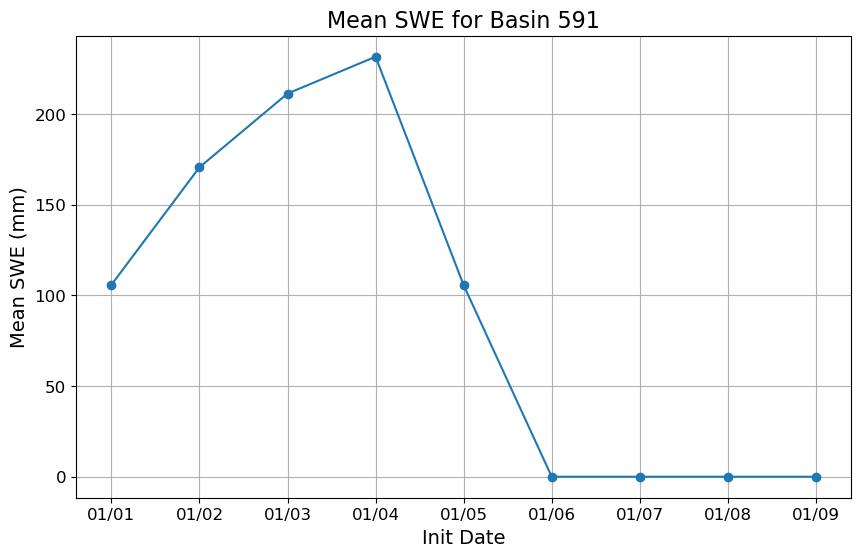

<xarray.DataArray 'mean_SWE' (basin_id: 1, init_date: 9)>
array([[105.83833333, 170.66666667, 211.33333333, 231.66666667,
        105.63333333,   0.        ,   0.        ,   0.        ,
          0.        ]])
Coordinates:
  * basin_id   (basin_id) <U3 '591'
  * init_date  (init_date) <U5 '01/01' '01/02' '01/03' ... '01/08' '01/09'

In [85]:
import xarray as xr
import os
import pandas as pd
import matplotlib.pyplot as plt

# Liste der Basins
basin_ids = ['591', '1083', '1169', '1341', '1403', '1537', '1673', '1780']
init_dates = ['01/01', '01/02', '01/03', '01/04', '01/05', '01/06', '01/07', '01/08', '01/09']

# Pfad zu den SWE-Dateien
data_dir = "../../CAMELS_SW/output_data/"

basin_id = '591'
file_path = os.path.join(data_dir, f"SWE_1979_2022_gapfilled_basin{basin_id}.nc")
SWE_591 = xr.open_dataset(file_path)
print(SWE_591)

# Extrahieren der SWE-Variable
SWE = SWE_591['SWE']

# Konvertieren der Zeit-Koordinaten in einen Pandas-Datetime-Index für einfachere Filterung
SWE = SWE.assign_coords(time=pd.to_datetime(SWE['time'].values))

# Berechnen der klimatologischen Mediane für die angegebenen Daten
climatological_medians = {}
for init_date in init_dates:
    # Monat/Tag extrahieren, um die Filterung durchzuführen
    month_day = pd.to_datetime(init_date, format='%d/%m').strftime('%d-%m')
    
    # SWE-Daten für das spezifische Monat/Tag über alle Jahre filtern
    filtered_swe = SWE.sel(time=SWE['time'].dt.strftime('%d-%m') == month_day)
    
    # Klimatologischen Median für jede Station berechnen
    climatological_medians[init_date] = filtered_swe.median(dim='time')

# Ergebnisse in ein DataFrame konvertieren
climatological_medians_df = pd.DataFrame({
    init_date: climatological_medians[init_date].values
    for init_date in init_dates
}, index=SWE['station_id'].values)

# Mittelwert der 3 Stationen für jedes init_date berechnen
mean_swe_per_date = climatological_medians_df.mean(axis=0)

# Ergebnisse in ein xarray-DataArray speichern
SWE_climatological = xr.DataArray(
    data=[mean_swe_per_date.values],
    dims=["basin_id", "init_date"],
    coords={"basin_id": [basin_id], "init_date": init_dates},
    name="mean_SWE"
)

# Visualisierung
plt.figure(figsize=(10, 6))
plt.plot(init_dates, SWE_climatological.sel(basin_id=basin_id).values.flatten(), marker='o', linestyle='-')
plt.title(f"Mean SWE for Basin {basin_id}")
plt.xlabel("Init Date")
plt.ylabel("Mean SWE (mm)")
plt.grid(True)
plt.show()

# Optional: Ausgabe des xarray-DataArrays
display(SWE_climatological)


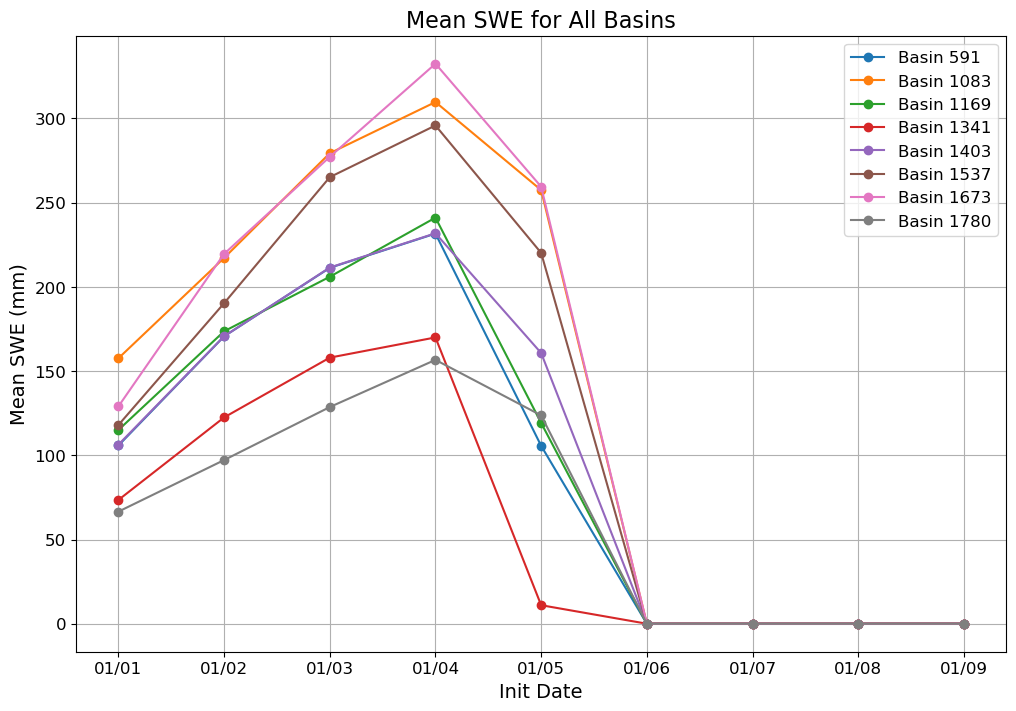

<xarray.DataArray 'swe_clim_median' (basin_id: 8, init_date: 9)>
array([[105.83833333, 170.66666667, 211.33333333, 231.66666667,
        105.63333333,   0.        ,   0.        ,   0.        ,
          0.        ],
       [157.62      , 217.215     , 279.3725    , 309.7625    ,
        257.5       ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [115.055     , 173.63833333, 206.03333333, 241.13      ,
        119.21166667,   0.        ,   0.        ,   0.        ,
          0.        ],
       [ 73.5       , 122.5       , 158.        , 170.        ,
         11.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [106.33833333, 170.66666667, 211.5       , 231.83333333,
        160.74333333,   0.        ,   0.        ,   0.        ,
          0.        ],
       [118.        , 190.325     , 265.165     , 295.87      ,
        220.185     ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [129.06      , 219.58      , 277.2425    , 332.5225    ,
        259.5       ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [ 66.5675    ,  97.185     , 128.65      , 156.675     ,
        123.7       ,   0.        ,   0.        ,   0.        ,
          0.        ]])
Coordinates:
  * basin_id   (basin_id) <U4 '591' '1083' '1169' ... '1537' '1673' '1780'
  * init_date  (init_date) <U5 '01/01' '01/02' '01/03' ... '01/08' '01/09'

<xarray.DataArray 'swe_clim_median' (init_date: 9)>
array([105.83833333, 170.66666667, 211.33333333, 231.66666667,
       105.63333333,   0.        ,   0.        ,   0.        ,
         0.        ])
Coordinates:
    basin_id   <U4 '591'
  * init_date  (init_date) <U5 '01/01' '01/02' '01/03' ... '01/08' '01/09'

In [86]:
import xarray as xr
import os
import pandas as pd
import matplotlib.pyplot as plt

# Liste der Basins
basin_ids = ['591', '1083', '1169', '1341', '1403', '1537', '1673', '1780']
init_dates = ['01/01', '01/02', '01/03', '01/04', '01/05', '01/06', '01/07', '01/08', '01/09']

# Pfad zu den SWE-Dateien
data_dir = "../../CAMELS_SW/output_data/"

# Liste, um die Ergebnisse für alle Basins zu speichern
mean_swe_results = []

for basin_id in basin_ids:
    # Laden der SWE-Datei für das aktuelle Basin
    file_path = os.path.join(data_dir, f"SWE_1979_2022_gapfilled_basin{basin_id}.nc")
    SWE_dataset = xr.open_dataset(file_path)
    
    # Extrahieren der SWE-Variable
    SWE = SWE_dataset['SWE']

    # Konvertieren der Zeit-Koordinaten in einen Pandas-Datetime-Index für einfachere Filterung
    SWE = SWE.assign_coords(time=pd.to_datetime(SWE['time'].values))

    # Berechnen der klimatologischen Mediane für die angegebenen Daten
    climatological_medians = {}
    for init_date in init_dates:
        # Monat/Tag extrahieren, um die Filterung durchzuführen
        month_day = pd.to_datetime(init_date, format='%d/%m').strftime('%d-%m')
        
        # SWE-Daten für das spezifische Monat/Tag über alle Jahre filtern
        filtered_swe = SWE.sel(time=SWE['time'].dt.strftime('%d-%m') == month_day)
        
        # Klimatologischen Median für jede Station berechnen
        climatological_medians[init_date] = filtered_swe.median(dim='time')

    # Ergebnisse in ein DataFrame konvertieren
    climatological_medians_df = pd.DataFrame({
        init_date: climatological_medians[init_date].values
        for init_date in init_dates
    }, index=SWE['station_id'].values)

    # Mittelwert der 3 Stationen für jedes init_date berechnen
    mean_swe_per_date = climatological_medians_df.mean(axis=0)
    
    # Speichern der Ergebnisse für das aktuelle Basin
    mean_swe_results.append(mean_swe_per_date.values)

# Ergebnisse in ein xarray-DataArray speichern
SWE_climatological = xr.DataArray(
    data=mean_swe_results,
    dims=["basin_id", "init_date"],
    coords={"basin_id": basin_ids, "init_date": init_dates},
    name="mean_SWE"
)

# Visualisierung für alle Basins
plt.figure(figsize=(12, 8))
for basin_id in basin_ids:
    plt.plot(init_dates, SWE_climatological.sel(basin_id=basin_id).values, marker='o', label=f"Basin {basin_id}")

plt.title("Mean SWE for All Basins")
plt.xlabel("Init Date")
plt.ylabel("Mean SWE (mm)")
plt.legend()
plt.grid(True)
plt.show()

# Optional: Ausgabe des xarray-DataArrays
SWE_climatological.name = "swe_clim_median"
display(SWE_climatological)
display(SWE_climatological.sel(basin_id='591'))


In [107]:
import xarray as xr
import pandas as pd
import numpy as np
P_climatological = P_climatological.sel(Station_ID=basin_ids)
# Liste zum Speichern der Ergebnisse
results = []

# Schleife über alle init_dates und target_periods
for init_date in SWE_climatological.init_date.values:
    for target_period in P_climatological.target_period.values:
        # Parse target_period und init_date
        target_start, target_end = target_period.split('-')
        target_start_day, target_start_month = map(int, target_start.split('/'))
        target_end_day, target_end_month = map(int, target_end.split('/'))
        init_day, init_month = map(int, init_date.split('/'))
        
        # Prüfen, ob init_date in target_period liegt
        if (target_start_month >= init_month ):
            
            # Greife auf SWE- und P-Daten zu
            swe_values = SWE_climatological.sel(init_date=init_date).squeeze()
            p_values = P_climatological.sel(target_period=target_period).p_clim_median.squeeze()
            
            # Sicherstellen, dass beide Arrays 1D sind
            swe_values = swe_values.values.flatten()
            p_values = p_values.values.flatten()
            
            # Berechne das Verhältnis P/SWE
            with np.errstate(divide='ignore', invalid='ignore'):  # Um Division durch Null zu behandeln
                ratio = np.divide(p_values, swe_values, where=(swe_values != 0))
            
            # Erstelle ein temporäres Dataset mit allen Dimensionen
            temp_ds = xr.Dataset(
                {
                    "P_values": (("Station_ID"), p_values),
                    "SWE_values": (("Station_ID"), swe_values),
                    "P_to_SWE_ratio": (("Station_ID"), ratio),
                },
                coords={
                    "Station_ID": SWE_climatological.basin_id.values,
                    "init_date": [str(init_date)],  # Konvertiere zu String
                    "target_period": [str(target_period)],  # Konvertiere zu String
                }
            )
            
            # Anhängen an die Ergebnisse
            results.append(temp_ds)

# Sicherstellen, dass Ergebnisse vorhanden sind
if len(results) > 0:
    # Kombiniere die Ergebnisse in ein einzelnes Dataset entlang neuer Dimensionen
    combined_results = xr.concat(
        results, 
        dim="combination"
    )
    
    # Füge die init_date und target_period-Dimensionen als Koordinaten hinzu
    combined_results = combined_results.assign_coords(
        init_date=("combination", [ds.init_date.values[0] for ds in results]),
        target_period=("combination", [ds.target_period.values[0] for ds in results])
    )

    # Ausgabe der Struktur des neuen Datasets
    print(combined_results)
else:
    print("Keine Ergebnisse gefunden. Überprüfen Sie Ihre Eingabedaten.")


<xarray.Dataset>
Dimensions:         (Station_ID: 8, combination: 45)
Coordinates:
    target_period   (combination) <U11 '01/01-30/09' ... '01/09-30/09'
    init_date       (combination) <U5 '01/01' '01/01' ... '01/08' '01/09'
  * Station_ID      (Station_ID) <U4 '591' '1083' '1169' ... '1673' '1780'
Dimensions without coordinates: combination
Data variables:
    P_values        (combination, Station_ID) float64 642.0 656.0 ... 89.67 48.9
    SWE_values      (combination, Station_ID) float64 105.8 157.6 ... 0.0 0.0
    P_to_SWE_ratio  (combination, Station_ID) float64 6.066 4.162 ... 0.0 0.0


In [108]:
import os
crpss_data_path = "../../CAMELS_SW/output_data/probabilistic_niv_suf"
files = [os.path.join(crpss_data_path, f) for f in os.listdir(crpss_data_path) if f.endswith(".nc")]

# Erstelle eine leere Liste für die Datasets
datasets = []

for file in files:
    # Lade das Dataset
    ds = xr.open_dataset(file)

    # Extrahiere die Station_ID aus dem Dateinamen (z. B. `probabilistic_verification_basin_XXXX.nc`)
    station_id = os.path.basename(file).split("_")[3].split(".")[0]  # Passe diesen Code an, wenn die Struktur anders ist

    # Füge eine neue Dimension für die Station_ID hinzu
    ds = ds.expand_dims({"Station_ID": [station_id]})
    datasets.append(ds)

# Kombiniere die Datasets entlang der Station_ID-Dimension
crpss_dataset = xr.concat(datasets, dim="Station_ID")

# Optional: Speichere das kombinierte Dataset
crpss_dataset.to_netcdf("combined_stations.nc")

# Zeige die Struktur des kombinierten Datasets
display(crpss_dataset)

<xarray.Dataset>
Dimensions:            (Station_ID: 8, bins: 11, event: 2, init_date: 9, iteration: 100, rate: 2, target_period: 9)
Coordinates:
  * rate               (rate) object 'FAR' 'HR'
  * bins               (bins) float64 0.0 0.1 0.2 0.3 0.4 ... 0.7 0.8 0.9 1.0
  * event              (event) float64 0.33 0.66
  * init_date          (init_date) object '01/01' '01/02' ... '01/08' '01/09'
  * iteration          (iteration) int32 1 2 3 4 5 6 7 ... 94 95 96 97 98 99 100
  * target_period      (target_period) object '1Jan-30Sep' ... '1Sep-30Sep'
  * Station_ID         (Station_ID) object '1083' '1169' '1341' ... '1780' '591'
Data variables:
    CRPSS              (Station_ID, init_date, target_period, iteration) float64 0.02 ... -0.02
    fairCRPSS          (Station_ID, init_date, target_period, iteration) float64 0.58 ... -0.42
    Reliability_index  (Station_ID, init_date, target_period, iteration) float64 0.86 ... 0.87
    ROC_AUC            (Station_ID, init_date, target_period, iteration, event) float64 0.52 ... 0.58
    ROC                (Station_ID, init_date, target_period, iteration, rate, bins, event) float64 1.0 ... 0.0
Attributes:
    info:     Various probabilistic verification metrics calculated for basin...

In [109]:
# Display the CRPSS dataset
display(crpss_dataset)
# Extrahiere die Werte von combination in target_period und init_date
target_periods = combined_results['target_period'].values
init_dates = combined_results['init_date'].values

# Erstelle ein neues Dataset mit target_period und init_date als Dimensionen
p_swe_ratio = combined_results.assign_coords(
    target_period=("combination", target_periods),
    init_date=("combination", init_dates)
).set_index(combination=["target_period", "init_date"]).unstack("combination")
p_swe_ratio = p_swe_ratio.sel(Station_ID=crpss_dataset['Station_ID'])
display(p_swe_ratio)

<xarray.Dataset>
Dimensions:            (Station_ID: 8, bins: 11, event: 2, init_date: 9, iteration: 100, rate: 2, target_period: 9)
Coordinates:
  * rate               (rate) object 'FAR' 'HR'
  * bins               (bins) float64 0.0 0.1 0.2 0.3 0.4 ... 0.7 0.8 0.9 1.0
  * event              (event) float64 0.33 0.66
  * init_date          (init_date) object '01/01' '01/02' ... '01/08' '01/09'
  * iteration          (iteration) int32 1 2 3 4 5 6 7 ... 94 95 96 97 98 99 100
  * target_period      (target_period) object '1Jan-30Sep' ... '1Sep-30Sep'
  * Station_ID         (Station_ID) object '1083' '1169' '1341' ... '1780' '591'
Data variables:
    CRPSS              (Station_ID, init_date, target_period, iteration) float64 0.02 ... -0.02
    fairCRPSS          (Station_ID, init_date, target_period, iteration) float64 0.58 ... -0.42
    Reliability_index  (Station_ID, init_date, target_period, iteration) float64 0.86 ... 0.87
    ROC_AUC            (Station_ID, init_date, target_period, iteration, event) float64 0.52 ... 0.58
    ROC                (Station_ID, init_date, target_period, iteration, rate, bins, event) float64 1.0 ... 0.0
Attributes:
    info:     Various probabilistic verification metrics calculated for basin...

<xarray.Dataset>
Dimensions:         (Station_ID: 8, init_date: 9, target_period: 9)
Coordinates:
  * Station_ID      (Station_ID) <U4 '1083' '1169' '1341' ... '1780' '591'
  * target_period   (target_period) object '01/01-30/09' ... '01/09-30/09'
  * init_date       (init_date) object '01/01' '01/02' ... '01/08' '01/09'
Data variables:
    P_values        (Station_ID, target_period, init_date) float64 656.0 ... 85.69
    SWE_values      (Station_ID, target_period, init_date) float64 157.6 ... 0.0
    P_to_SWE_ratio  (Station_ID, target_period, init_date) float64 4.162 ... 1.455e-311

array([[-0.03 , -0.04 , -0.02 , -0.03 , -0.   ,  0.07 ,    nan,    nan,
           nan],
       [-0.06 , -0.065, -0.01 , -0.01 ,  0.   , -0.01 ,    nan,    nan,
           nan],
       [ 0.03 , -0.02 ,  0.04 ,  0.045,  0.03 ,  0.   ,    nan,    nan,
           nan],
       [-0.05 , -0.01 ,  0.03 ,  0.04 ,  0.07 , -0.03 ,    nan,    nan,
           nan],
       [-0.04 ,  0.02 ,  0.07 ,  0.05 ,  0.06 ,  0.05 ,    nan,    nan,
           nan],
       [-0.06 ,  0.01 ,  0.12 ,  0.165,  0.25 , -0.01 ,    nan,    nan,
           nan],
       [-0.015, -0.02 , -0.03 , -0.035,  0.005, -0.21 ,    nan,    nan,
           nan],
       [-0.03 , -0.02 ,  0.04 , -0.01 ,  0.03 , -0.02 ,    nan,    nan,
           nan]])

array([[2.36491367e+00, 1.71607713e+00, 1.33426767e+00, 1.20336611e+00,
        1.44760269e+00, 0.00000000e+00,            nan,            nan,
                   nan],
       [3.20403242e+00, 2.12303322e+00, 1.78922480e+00, 1.52880168e+00,
        3.09231437e+00, 0.00000000e+00,            nan,            nan,
                   nan],
       [4.90620052e+00, 2.94372031e+00, 2.28231480e+00, 2.12121022e+00,
        3.27823398e+01, 0.00000000e+00,            nan,            nan,
                   nan],
       [3.08095736e+00, 1.91967112e+00, 1.54904903e+00, 1.41318708e+00,
        2.03818015e+00, 0.00000000e+00,            nan,            nan,
                   nan],
       [3.22240778e+00, 1.99786743e+00, 1.43399060e+00, 1.28517294e+00,
        1.72693016e+00, 0.00000000e+00,            nan,            nan,
                   nan],
       [2.43977371e+00, 1.43399761e+00, 1.13574648e+00, 9.46935004e-01,
        1.21339959e+00, 0.00000000e+00,            nan,            nan,
           

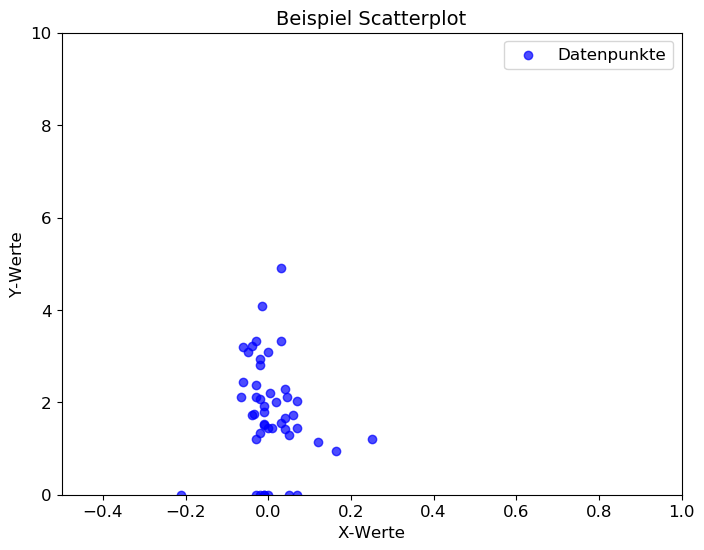

In [110]:
# Median über die Dimension 'iteration' berechnen
reduced_crpss_dataset = crpss_dataset.median(dim='iteration')

x = reduced_crpss_dataset.sel(target_period='1Jun-30Sep')['CRPSS'].values
display(x)
target_period = '01/06-30/09'  # Specify the target period
y = p_swe_ratio.sel(target_period=target_period)['P_to_SWE_ratio'].values
display(y)

# Scatterplot erstellen
plt.figure(figsize=(8, 6))  # Optionale Größe des Plots
plt.scatter(x, y, color='blue', alpha=0.7, label='Datenpunkte')  # Erstelle den Scatterplot

# Achsenbeschriftungen hinzufügen
plt.xlabel("X-Werte", fontsize=12)
plt.ylabel("Y-Werte", fontsize=12)

# Titel und Legende
plt.title("Beispiel Scatterplot", fontsize=14)
plt.legend()

# Achsengrenzen festlegen
plt.xlim(-0.5, 1)  # X-Achse von -0.5 bis 1
plt.ylim(0, 10)    # Y-Achse von 0 bis 10

# Plot anzeigen
plt.show()

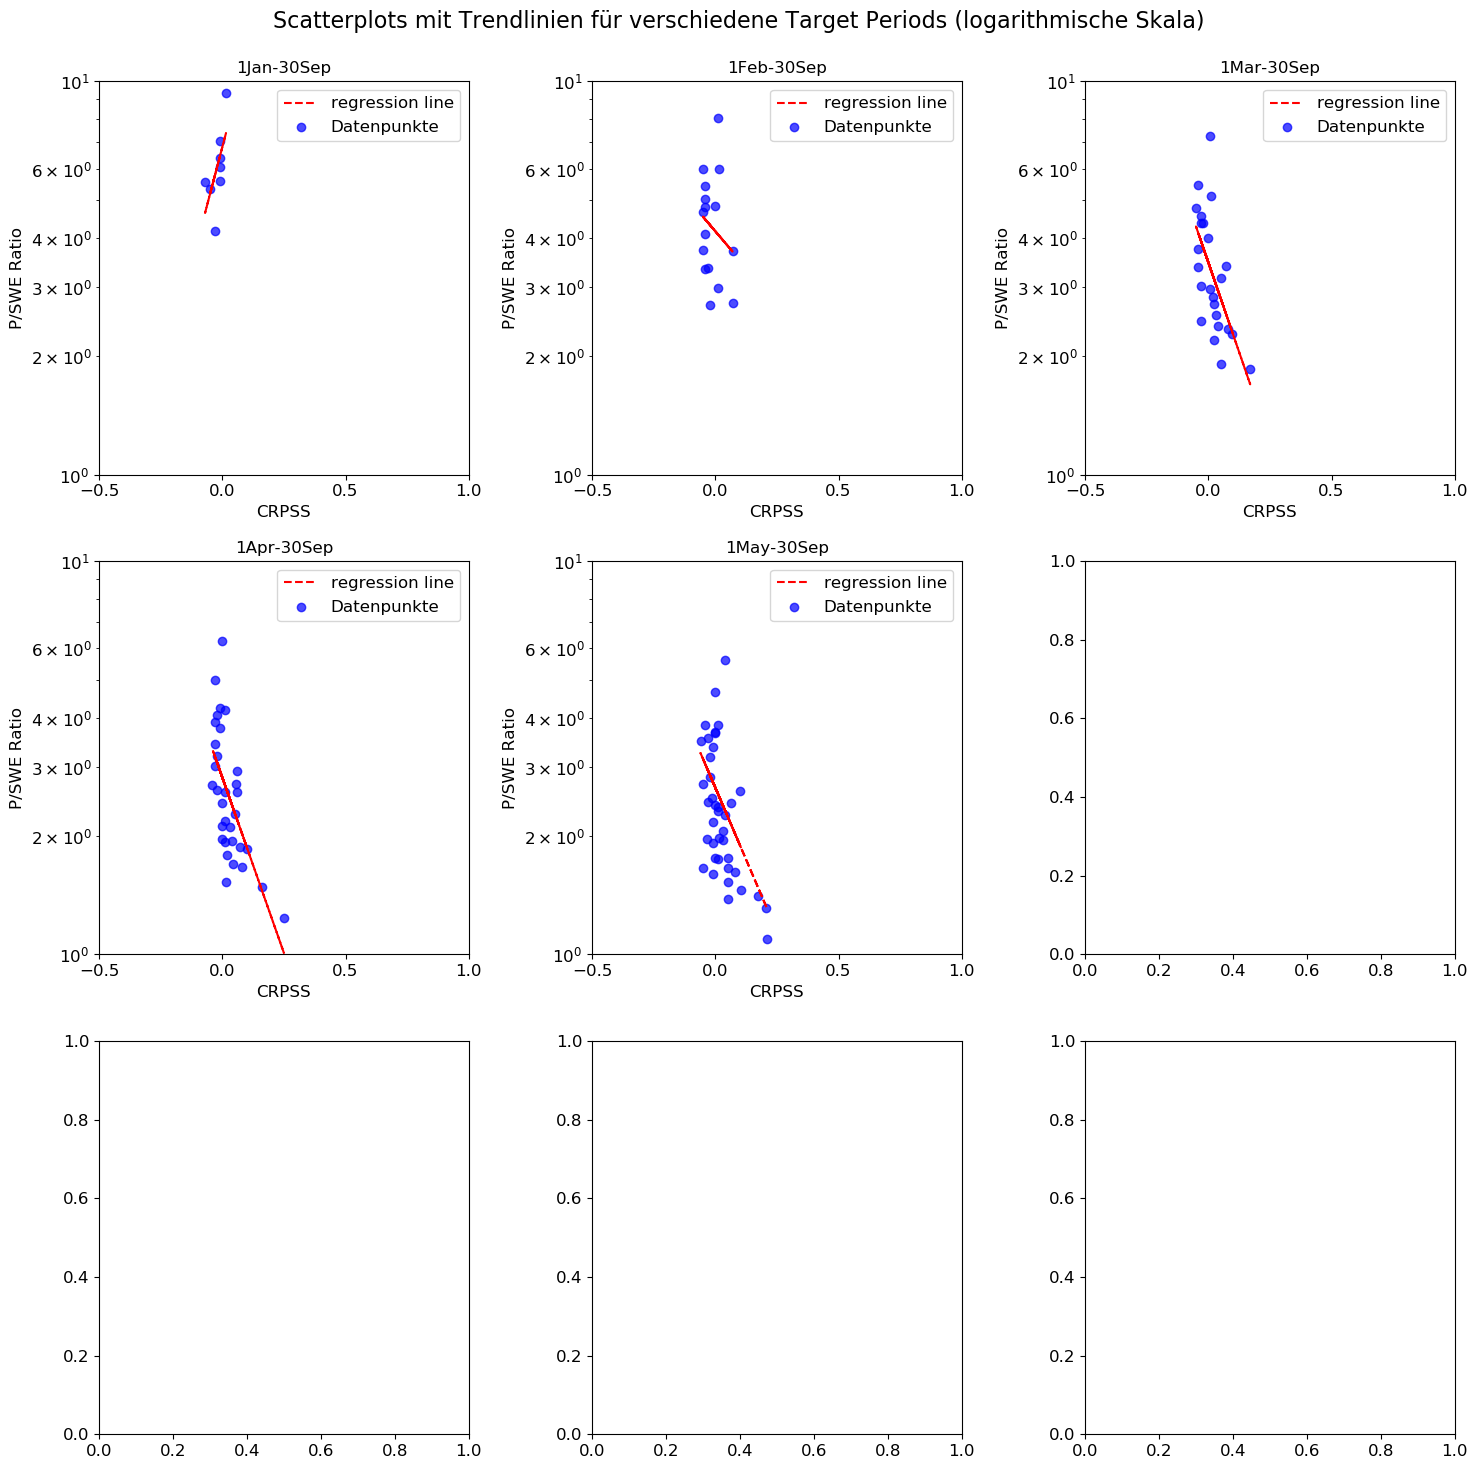

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# Schriftgrößen global anpassen
plt.rcParams.update({
    'font.size': 14,          # Allgemeine Schriftgröße
    'axes.titlesize': 16,     # Titelgröße
    'axes.labelsize': 14,     # Achsenbeschriftung
    'xtick.labelsize': 12,    # X-Tick-Beschriftung
    'ytick.labelsize': 12,    # Y-Tick-Beschriftung
    'legend.fontsize': 12,    # Legende
})
# Definiere die Target Periods
target_periods_crpss = ['1Jan-30Sep', '1Feb-30Sep', '1Mar-30Sep', '1Apr-30Sep', 
                        '1May-30Sep']#, '1Jun-30Sep', '1Jul-30Sep', '1Aug-30Sep', '1Sep-30Sep']
target_periods_ratio = ['01/01-30/09', '01/02-30/09', '01/03-30/09', '01/04-30/09', 
                        '01/05-30/09']#, '01/06-30/09', '01/07-30/09', '01/08-30/09', '01/09-30/09']

# Erstelle ein Grid für die Subplots (3x3)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Scatterplots mit Trendlinien für verschiedene Target Periods (logarithmische Skala)", fontsize=16)

# Iteriere über die Target Periods und erstelle die Scatterplots mit Trendlinien
for i, (tp_crpss, tp_ratio) in enumerate(zip(target_periods_crpss, target_periods_ratio)):
    row = i // 3
    col = i % 3
    
    # Daten extrahieren
    x = reduced_crpss_dataset.sel(target_period=tp_crpss)['CRPSS'].values
    y = p_swe_ratio.sel(target_period=tp_ratio)['P_to_SWE_ratio'].values
    
    # Entferne NaN-Werte
    valid_mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[valid_mask]
    y = y[valid_mask]
    
    # Erstelle Scatterplot im entsprechenden Subplot
    ax = axes[row, col]
    ax.scatter(x, y, color='blue', alpha=0.7, label='Datenpunkte')
 
    # Füge eine Trendlinie hinzu (lineare Regression)
    if len(x) > 1 and len(y) > 1:  # Nur wenn genügend Datenpunkte vorhanden sind
        coeffs = np.polyfit(x, np.log10(y), 1)  # Logarithmische Regression
        trendline = np.poly1d(coeffs)  # Erstelle Trendlinienfunktion
        ax.plot(x, 10**trendline(x), color='red', linestyle='--', label='regression line')
   
    # Setze logarithmische y-Achse
    ax.set_yscale('log')
    ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=[]))  # Nur Hauptwerte anzeigen
    ax.yaxis.set_major_formatter(ticker.LogFormatterMathtext(base=10.0))  # Wissenschaftliche Notation (10^x)
    
    # Fixe Achsengrenzen
    ax.set_ylim(10**0, 10**1)  # Von 10^0 bis 10^2 (1 bis 100)
    ax.set_xticks(np.arange(-0.5, 1.1, 0.5))
    ax.set_xlim(-0.5, 1)       # X-Achse von -0.5 bis 1
    
    # Titel und Achsenbeschriftungen
    ax.set_title(tp_crpss, fontsize=12)
    ax.set_xlabel("CRPSS", fontsize=12)
    ax.set_ylabel("P/SWE Ratio", fontsize=12)
    ax.legend()

# Layout optimieren
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Platz für den Supertitel lassen
plt.savefig("C:/Users/lauri/PycharmProjects/FROSTBYTE_SW/CAMELS_SW/evaluation/P_SWE_ratio_vs_CRPSS.png", dpi=300, bbox_inches="tight")
plt.show()


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


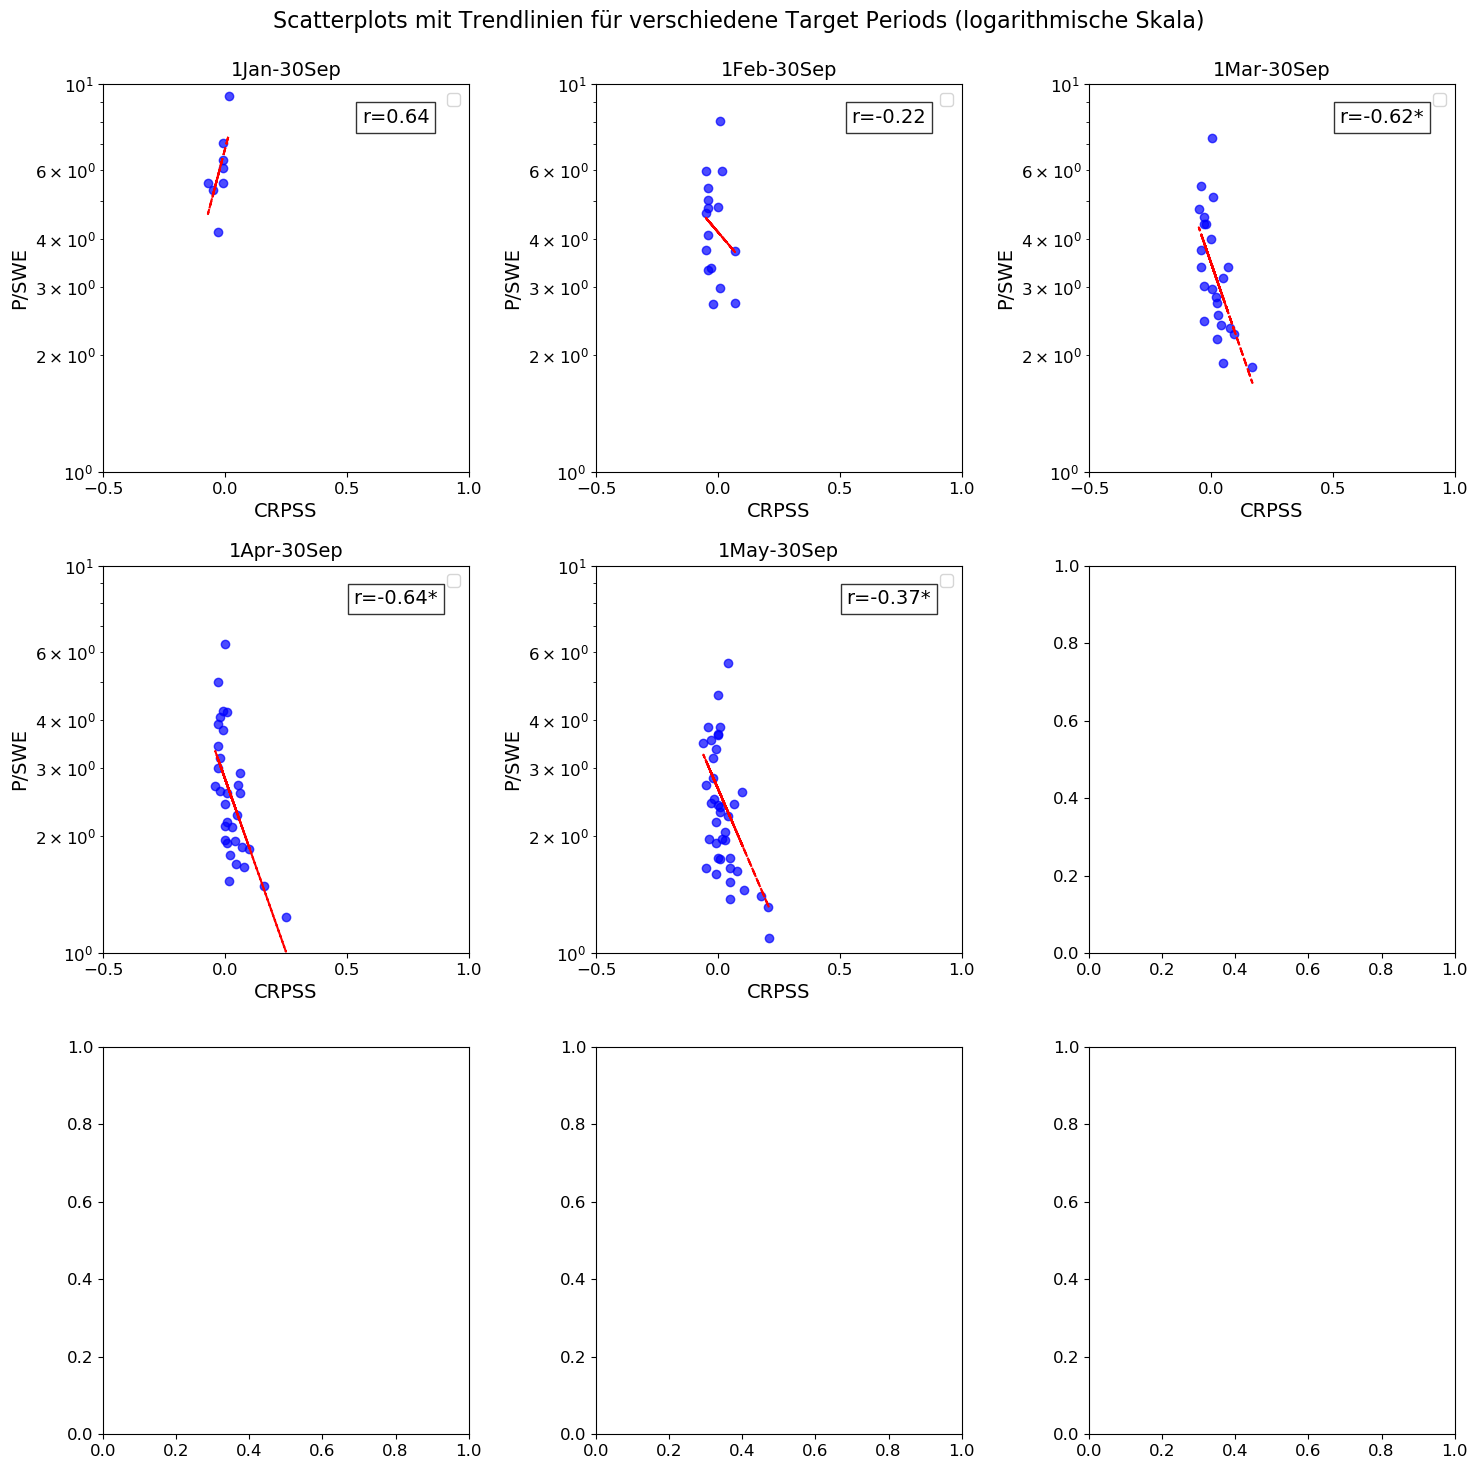

In [113]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import pearsonr  # Import for calculating Pearson correlation coefficient

# Schriftgrößen global anpassen
plt.rcParams.update({
    'font.size': 14,          # Allgemeine Schriftgröße
    'axes.titlesize': 16,     # Titelgröße
    'axes.labelsize': 14,     # Achsenbeschriftung
    'xtick.labelsize': 12,    # X-Tick-Beschriftung
    'ytick.labelsize': 12,    # Y-Tick-Beschriftung
    'legend.fontsize': 12,    # Legende
})

# Definiere die Target Periods
target_periods_crpss = ['1Jan-30Sep', '1Feb-30Sep', '1Mar-30Sep', '1Apr-30Sep', 
                        '1May-30Sep']#, '1Jun-30Sep', '1Jul-30Sep', '1Aug-30Sep', '1Sep-30Sep']
target_periods_ratio = ['01/01-30/09', '01/02-30/09', '01/03-30/09', '01/04-30/09', 
                        '01/05-30/09']#, '01/06-30/09', '01/07-30/09', '01/08-30/09', '01/09-30/09']

# Erstelle ein Grid für die Subplots (3x3)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Scatterplots mit Trendlinien für verschiedene Target Periods (logarithmische Skala)", fontsize=16)

# Iteriere über die Target Periods und erstelle die Scatterplots mit Trendlinien
for i, (tp_crpss, tp_ratio) in enumerate(zip(target_periods_crpss, target_periods_ratio)):
    row = i // 3
    col = i % 3
    
    # Daten extrahieren
    x = reduced_crpss_dataset.sel(target_period=tp_crpss)['CRPSS'].values
    y = p_swe_ratio.sel(target_period=tp_ratio)['P_to_SWE_ratio'].values
    
    # Entferne NaN-Werte
    valid_mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[valid_mask]
    y = y[valid_mask]
    
    # Erstelle Scatterplot im entsprechenden Subplot
    ax = axes[row, col]
    ax.scatter(x, y, color='blue', alpha=0.7)
 
    # Füge eine Trendlinie hinzu (lineare Regression)
    if len(x) > 1 and len(y) > 1:  # Nur wenn genügend Datenpunkte vorhanden sind
        coeffs = np.polyfit(x, np.log10(y), 1)  # Logarithmische Regression
        trendline = np.poly1d(coeffs)  # Erstelle Trendlinienfunktion
        ax.plot(x, 10**trendline(x), color='red', linestyle='--')

        # Berechne Pearson-Korrelationskoeffizienten
        r, p_value = pearsonr(x, np.log10(y))  # Korrelation basierend auf log(y)
        significance = '*' if p_value < 0.05 else ''  # Prüfe Signifikanz
        ax.text(0.8, 0.9, f"r={r:.2f}{significance}", transform=ax.transAxes,
                fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=0.8))
   
    # Setze logarithmische y-Achse
    ax.set_yscale('log')
    ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=[]))  # Nur Hauptwerte anzeigen
    ax.yaxis.set_major_formatter(ticker.LogFormatterMathtext(base=10.0))  # Wissenschaftliche Notation (10^x)
    
    # Fixe Achsengrenzen
    ax.set_ylim(10**0, 10**1)  # Von 10^0 bis 10^2 (1 bis 100)
    ax.set_xticks(np.arange(-0.5, 1.1, 0.5))
    ax.set_xlim(-0.5, 1)       # X-Achse von -0.5 bis 1
    
    # Titel und Achsenbeschriftungen
    ax.set_title(tp_crpss, fontsize=14)
    ax.set_xlabel("CRPSS", fontsize=14)
    ax.set_ylabel("P/SWE", fontsize=14)
    ax.legend()

# Layout optimieren
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Platz für den Supertitel lassen
plt.savefig("C:/Users/lauri/PycharmProjects/FROSTBYTE_SW/CAMELS_SW/evaluation/P_SWE_ratio_vs_CRPSS.png", dpi=300, bbox_inches="tight")
plt.show()
